<a href="https://colab.research.google.com/github/samuelmap1/Projetos/blob/main/Laptop_Pricing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Leitura e visualização inicial

In [3]:
laptop = pd.read_csv("Clean laptop data.csv")
laptop.head(10)

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,2,6.906891,SSD,2501,4,15.6,141,0.0,YES,235.99
1,ASUS,WINDOWS,2,7.000000,SSD,3048,3,15.6,141,1.0,YES,236.99
2,LENOVO,WINDOWS,2,7.000000,SSD,3685,3,15.6,94,0.0,YES,259.99
3,HP,WINDOWS,2,7.000000,SSD,2689,4,15.6,94,0.0,YES,223.49
4,DELL,WINDOWS,3,7.000000,SSD,3256,3,14.0,157,0.0,YES,374.49
5,ASUS,WINDOWS,4,10.965784,SSD,23322,1,16.0,142,0.0,YES,2396.49
6,LENOVO,WINDOWS,3,7.491853,SSD,3035,4,14.0,105,0.0,YES,151.99
7,LENOVO,WINDOWS,4,7.491853,SSD,6908,3,14.0,157,0.0,YES,428.49
8,LENOVO,WINDOWS,4,7.491853,SSD,2743,4,14.0,118,0.0,YES,296.99
9,ASUS,WINDOWS,4,9.965784,SSD,23697,2,14.0,162,1.0,YES,1410.49


### Análise Exploratória

In [4]:
laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM_nth,1001.0,3.367632,0.799194,1.00,3.00,3.00,4.00,6.000000
storage_nth,1001.0,8.423842,1.165340,4.00,8.00,8.00,9.00,10.965784
cpu_benchmark,1001.0,12691.523477,7597.321238,548.00,7607.00,10505.00,17163.00,41175.000000
gpu_class,1001.0,2.724276,0.773240,1.00,2.00,3.00,3.00,4.000000
screen_size,1001.0,14.638561,1.333751,10.10,14.00,14.00,15.60,17.300000
PPI,1001.0,158.789211,34.039426,94.00,141.00,157.00,166.00,338.000000
warranty,1001.0,1.293457,0.919774,0.00,1.00,1.00,1.00,3.250000
price,1001.0,1071.419041,791.968578,95.99,499.99,861.49,1410.49,5987.490000


In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1001 non-null   object 
 1   operating_system  1001 non-null   object 
 2   RAM_nth           1001 non-null   int64  
 3   storage_nth       1001 non-null   float64
 4   storage_type      1001 non-null   object 
 5   cpu_benchmark     1001 non-null   int64  
 6   gpu_class         1001 non-null   int64  
 7   screen_size       1001 non-null   float64
 8   PPI               1001 non-null   int64  
 9   warranty          1001 non-null   float64
 10  refurbished       1001 non-null   object 
 11  price             1001 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 94.0+ KB


In [6]:
laptop['brand'].value_counts()

LENOVO        322
ASUS          145
DELL           97
HP             94
ACER           77
DYNABOOK       62
APPLE          36
OTHER          29
CHILLBLAST     29
MSI            24
AVITA          20
RAZER          19
GEO            18
FUJITSU        15
MEDION         14
Name: brand, dtype: int64

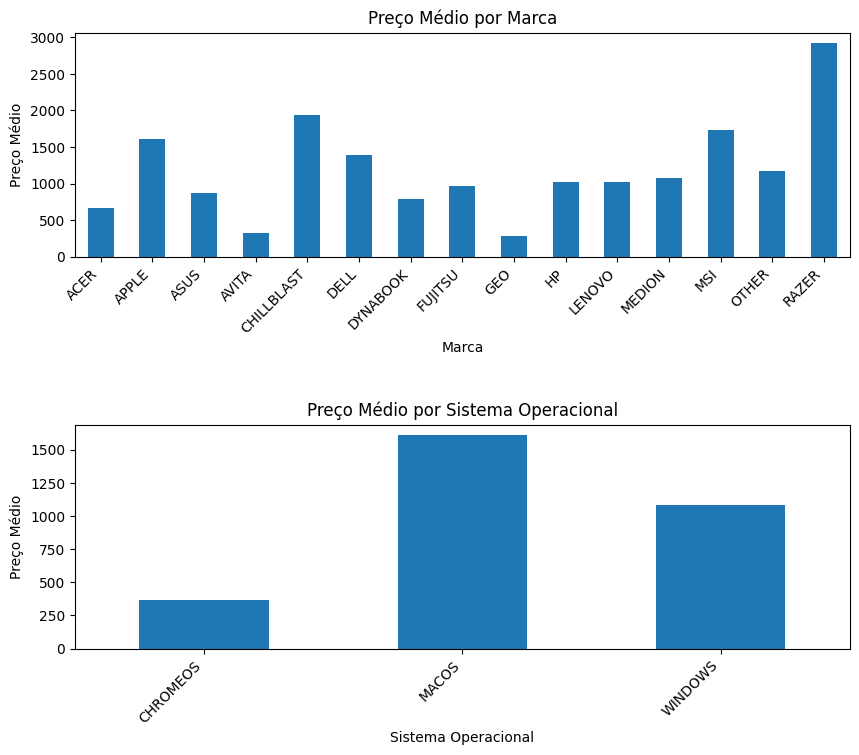

In [7]:
mean_price_brand = laptop.groupby('brand')['price'].mean()
mean_price_system = laptop.groupby('operating_system')['price'].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'hspace': 0.75})

mean_price_brand.plot(kind='bar', ax=axes[0])

axes[0].set_title('Preço Médio por Marca')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Marca')
axes[0].set_ylabel('Preço Médio')

mean_price_system.plot(kind='bar', ax=axes[1])

axes[1].set_title('Preço Médio por Sistema Operacional')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Sistema Operacional')
axes[1].set_ylabel('Preço Médio')

plt.show()

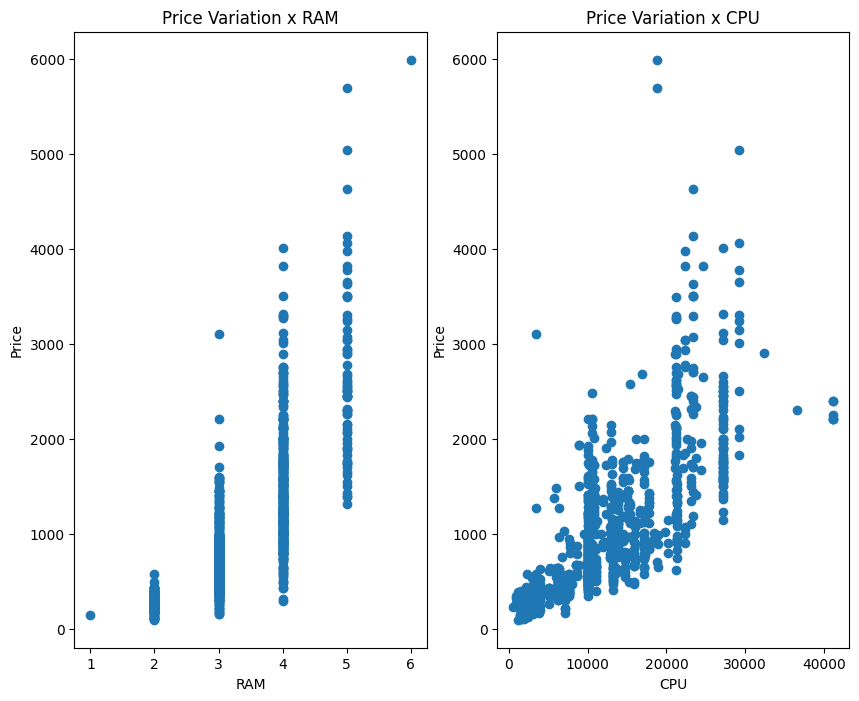

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'hspace': 0.75})

axes[0].scatter(laptop['RAM_nth'],laptop['price'])
axes[0].set_title('Price Variation x RAM')
axes[0].set_xlabel('RAM')
axes[0].set_ylabel('Price')

axes[1].scatter(laptop['cpu_benchmark'],laptop['price'])
axes[1].set_title('Price Variation x CPU')
axes[1].set_xlabel('CPU')
axes[1].set_ylabel('Price')

plt.show()

In [9]:
categorical_vars = ['storage_type','refurbished','brand','operating_system']
numerical_vars = ['RAM_nth','storage_nth', 'cpu_benchmark','gpu_class','screen_size','PPI','warranty']

In [10]:
for var in categorical_vars:
    classes_unicas = laptop[var].unique()
    numero_de_classes_unicas = len(classes_unicas)
    print(f'Para a variável categórica "{var}", existem {numero_de_classes_unicas} classes únicas.')

Para a variável categórica "storage_type", existem 2 classes únicas.
Para a variável categórica "refurbished", existem 2 classes únicas.
Para a variável categórica "brand", existem 15 classes únicas.
Para a variável categórica "operating_system", existem 3 classes únicas.


<ipython-input-11-08f623fc96ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = laptop.corr()


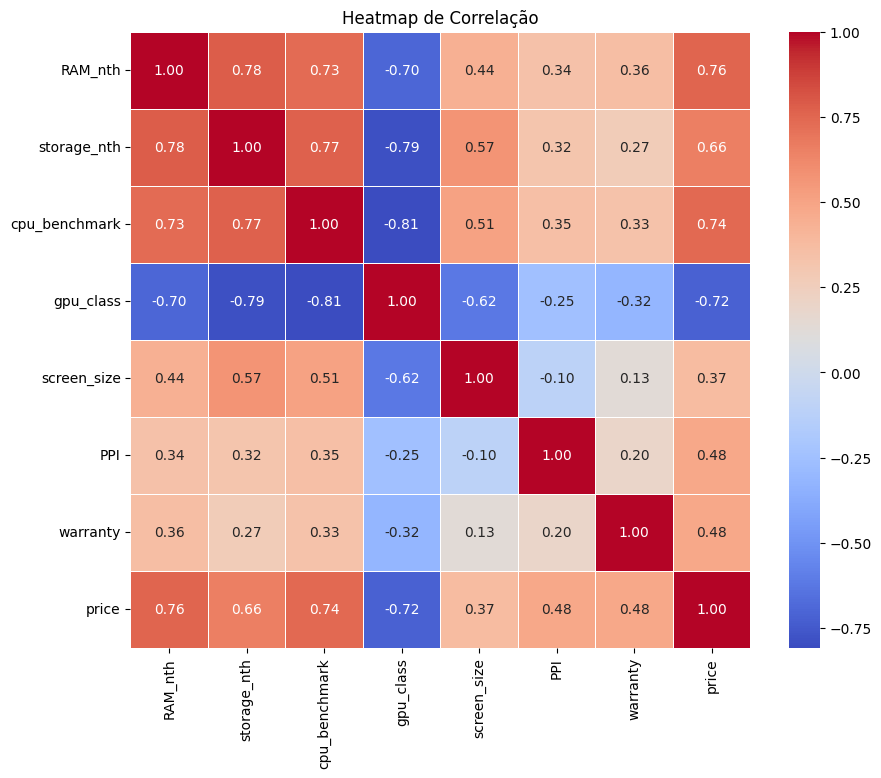

In [11]:
correlation_matrix = laptop.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()